## Exercise 1

Create a vectorized version of log and exp math function for 1D array A = [2, 5, 10, 3, 8]

Results should be: 
+ [0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
+ [7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]

In [4]:
import os
import numpy as np
import math
os.environ["NUMBA_ENABLE_CUDASIM"] = "1"
from numba import jit, njit, vectorize, cuda, vectorize, int64, float32, float64
import matplotlib.pyplot as plt

A = np.array([2, 5, 10, 3, 8],dtype="float32")

@vectorize([float32(float32)], target='parallel', fastmath=True) 
def vectorized_log(x):
    return np.log(x)

@vectorize([float32(float32)], target='parallel', fastmath=True) 
def vectorized_exp(x):
    return np.exp(x)

print("Log:\n{}".format(vectorized_log(A)))
print("Exp:\n{}".format(vectorized_exp(A)))

/srv/conda/envs/notebook/lib/python3.8/site-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  numba.core.entrypoints.init_all()


Log:
[0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
Exp:
[7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]


## Exerice 2
Compute the value of a Gaussian probability density function at $x$ with $mean = 1$, $\sigma = 1$, lower and upper bound in $(-3, 3)$ and $size = 100000$

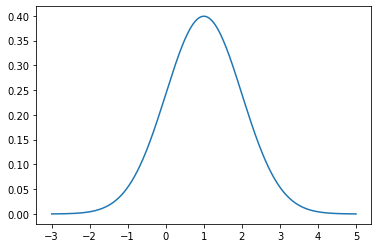

In [9]:
N = 100000
mu = 1
sigma = 1

@vectorize([float32(float32, float32, float32)], target='parallel', fastmath=True)
def gauss(x, mu, sigma):
    prob = math.exp(-0.5*((x-mu)/sigma)**2)/math.sqrt(2*np.pi*sigma**2)
    return prob

x = np.linspace(-3,5,N, dtype = 'float32')
y = gauss(x, mu, sigma)
plt.plot(x,y)
plt.show()

## Exercise 3

Create a "zero suppression" function. A common operation when working with waveforms is to force all samples values below a certain absolute magnitude to be zero, as a way to eliminate low amplitude noise. 
Plot the data before and after the application of the zero_suppress function.

$thresold = 15$

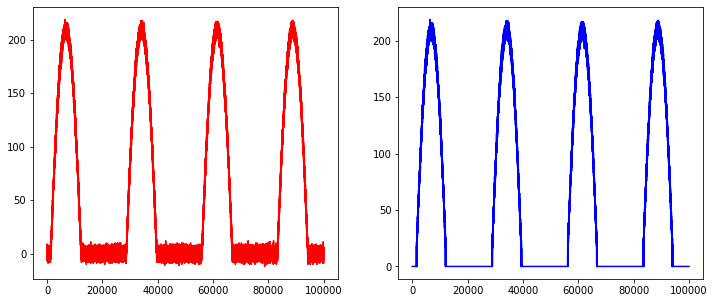

In [11]:
n = 100000

noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
data = ((pulses * 300) + noise).astype(np.int16)

threshold = 15
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))
ax1.plot(data, color = "red")

@vectorize([float32(float32)], target='parallel', fastmath=True)
def suppression(x):
    if(x> threshold):
        return x
    else:
        return 0

ax2.plot(suppression(data), color = "blue")
plt.show()

## Exercise 4

Calculate the Sigmoid kernel between the matrix X and Y defined as below. The Sigmoid kernel is defined as:

$k(x,y) = \tanh(\alpha x^T y + c) $

In [18]:
X = np.random.rand(3,4)
Y = np.random.rand(3,4)

@jit(nopython=True)
def sigmoid_kernel(x, y, alpha, c):
    return np.tanh(alpha * np.dot(x.T,y) + c)

print(sigmoid_kernel(X,Y,1,1))

[[0.96417871 0.95038146 0.95571697 0.97484538]
 [0.93937813 0.86125668 0.88493632 0.94030028]
 [0.80932756 0.88513245 0.86854142 0.84533948]
 [0.86790648 0.90327453 0.879583   0.88066909]]


## Exercise 5

Create a kernel function similar to the ```double_kernel``` see during the lecture and create a new function that takes a 3 dimensional matrix as input calculating the $cos$ for each element and then returns the result. The shape of the matrix must be $256X256X256$. The matrix can be randomly generated

In [20]:
data = np.random.uniform(0, 2*np.pi, size=(16,16,16))
@cuda.jit
def kernel_3D(data):
    i,j,k = cuda.grid(3)
    if i < data.shape[0] and j < data.shape[1] and k < data.shape[2]:
        data[i][j][k] = math.cos(data[i][j][k])
        

TypeError: __init__() got an unexpected keyword argument 'debug'

## Exercise 6

Create a matrix multiplication kernel function, called ```matmul``` that takes as input two 2D matrices:
+ A of shape $24x12$
+ B of shape $12x22$
and that computes the multiplication and put the results into a third matrix C of shape $24x22$

A and B must be randomly generated and only int values are allowed.


In [ ]:
from __future__ import division
from numba import cuda
import numpy
import math

@cuda.jit
def matmul(A, B, C):
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp


